Project 1: What factors have contributed to the spread of COVID-19 in different regions of the world

In [5]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import requests
import json 
import time
import os
import csv

In [6]:
# Retrieve Datasets

path_covid_country = r"Dataset\Covid\country_wise_latest.csv"
path_covid_complete = r"Dataset\Covid\covid_19_clean_complete.csv"
path_air_quality = r"Dataset\Air Quality\World_cities_air_quality_and_water_pollution_2020.csv"
path_air_pollution=r"Dataset\Air Quality\World_most_polluted_countries_regions_historical_data _2018-2021.csv"

path_government_resp = r"Dataset\Government_response\COVID_gov_complete_29_03.csv"
OxCGRT = r"Dataset\Government_response\OxCGRT_Download_29_03.csv"

path_vaccination_cases = r"Dataset\Vaccination\df_covid19_countries_cases.csv"
path_vaccination_rate = r"Dataset\Vaccination\df_covid19_countries_vaccination.csv"

covid_country_df = pd.read_csv(path_covid_country)
covid_complete_df = pd.read_csv(path_covid_complete)
air_quality_df = pd.read_csv(path_air_quality)
air_pollution_df= pd.read_csv(path_air_pollution,index_col=0)

covid_df = pd.read_csv(path_government_resp)
OxCGRT_index_df = pd.read_csv(OxCGRT, delimiter=';')

government_resp_df = pd.read_csv(path_government_resp)
vaccination_cases_df = pd.read_csv(path_vaccination_cases)
vaccination_rate_df = pd.read_csv(path_vaccination_rate)

Factor 1: Impact of Government Response on the spread of Covid-19 (Helena Fedorenko)

In [7]:
#Retrieve colums from a data set that we need
covid = covid_df[["CountryName", "Date", "ConfirmedCases", "Days_since_ConfirmedCases", "Days_since_S1_School closing_2.0", 
                     "Days_since_S3_Cancel public events_1.0", "Days_since_S2_Workplace closing_1.0", 
                     "Days_since_S7_International travel controls_3.0"]]

#Clean Data by renaming columns
covid_df = covid.rename(columns= {'CountryName' : 'Country Name',
                                    'ConfirmedCases': 'Confirmed Cases',
                                    'Days_since_ConfirmedCases':'Days since Confirmed Cases',
                                    'Days_since_S1_School closing_2.0' : 'Days since School closing',
                                    "Days_since_S3_Cancel public events_1.0": "Days since cancel Public Events",
                                    "Days_since_S2_Workplace closing_1.0":"Days since Workplace closing",
                                    'Days_since_S7_International travel controls_3.0': 'Days since International Travel Restrictions',
                                    })

covid_df['Date'] = covid_df['Date'].astype('datetime64')

new_covid_df=covid_df.reset_index(drop=True)

new_covid_df

,Country Name,Date,Confirmed Cases,Days since Confirmed Cases,Days since School closing,Days since cancel Public Events,Days since Workplace closing,Days since International Travel Restrictions
0,Hong Kong,2020-01-01,0.0,0,0,0,0,0
1,Hong Kong,2020-01-02,0.0,0,0,0,0,0
2,Hong Kong,2020-01-03,0.0,0,0,0,0,0
3,Hong Kong,2020-01-04,0.0,0,0,0,0,0
4,Hong Kong,2020-01-05,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
5088,United Kingdom,2020-03-21,3277.0,49,0,4,5,0
5089,United Kingdom,2020-03-22,3983.0,50,0,5,5,0
5090,United Kingdom,2020-03-23,5018.0,51,0,6,5,0
5091,United Kingdom,2020-03-24,5683.0,52,1,7,5,0


In [8]:
#Find particular countries that we are interested in
China = new_covid_df[new_covid_df['Country Name']=='China']

Spain = new_covid_df[new_covid_df['Country Name']=='Spain']

Italy = new_covid_df[new_covid_df['Country Name']=='Italy']

UK = new_covid_df[new_covid_df['Country Name']=='United Kingdom']

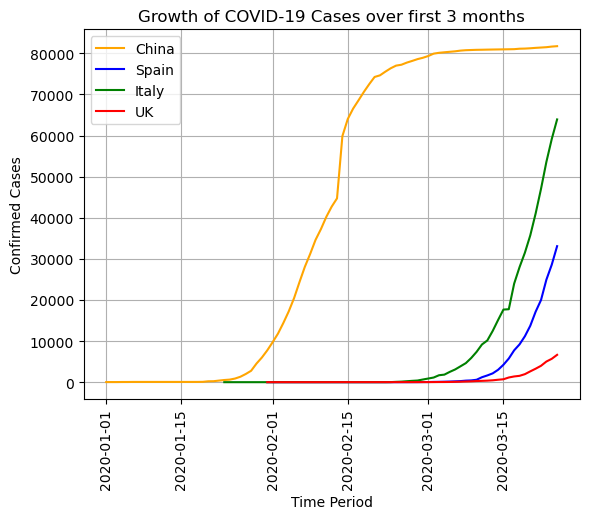

In [9]:
# Plot the Stringency Index over time

c, = plt.plot(China['Date'], China['Confirmed Cases'], color='orange', label='China')

s, = plt.plot(Spain['Date'], Spain['Confirmed Cases'], color='blue', label='Spain')

i = plt.plot(Italy['Date'], Italy['Confirmed Cases'], color='green', label='Italy')

u = plt.plot(UK['Date'], UK['Confirmed Cases'], color='r', label="UK")

plt.xticks(rotation="vertical")


# Add labels and a title to the plot
plt.xlabel('Time Period')
plt.ylabel('Confirmed Cases')
plt.title('Growth of COVID-19 Cases over first 3 months')

plt.savefig("Result\Growth of COVID-19 Cases over first 3 months.png")

plt.grid()
plt.legend(loc='best')


# Display the plot
plt.show()

In [10]:
#Retrieve colums from a second data set that we need
OxCGRT_index = OxCGRT_index_df[["CountryName", "Date", "StringencyIndex" ]]

OxCGRT_index_df = OxCGRT_index.rename(columns= {'CountryName' : 'Country Name',
                                                  "StringencyIndex": "Stringency Index",
                                              
                                    })

OxCGRT_index_df['Date'] = pd.to_datetime(OxCGRT_index_df['Date'], format='%Y%m%d')


OxCGRT_index_df

,Country Name,Date,Stringency Index
0,Afghanistan,2020-01-01,NaN
1,United Arab Emirates,2020-01-01,NaN
2,Argentina,2020-01-01,0.0
3,Armenia,2020-01-01,NaN
4,Australia,2020-01-01,7.0
...,...,...,...
9278,Malaysia,2020-03-27,86.0
9279,Romania,2020-03-27,86.0
9280,Serbia,2020-03-27,38.0
9281,Venezuela,2020-03-27,83.0


In [11]:
#Find particular countries that we are interested in
China_df = OxCGRT_index_df.loc[OxCGRT_index_df['Country Name']=='China']

Spain_df = OxCGRT_index_df.loc[OxCGRT_index_df['Country Name']=='Spain']

Italy_df = OxCGRT_index_df.loc[OxCGRT_index_df['Country Name']=='Italy']

UK_df = OxCGRT_index_df.loc[OxCGRT_index_df['Country Name']=='United Kingdom']

In [12]:
#Merge data
new_data_country = pd.concat([China_df, Spain_df, Italy_df, UK_df])

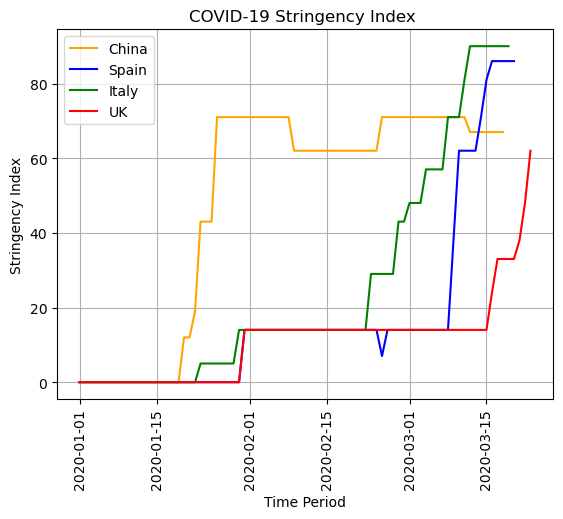

In [13]:
# Plot the Stringency Index over time

c, = plt.plot(China_df['Date'], China_df['Stringency Index'], color='orange', label="China")#orange

s, = plt.plot(Spain_df['Date'], Spain_df['Stringency Index'], color='blue', label='Spain')

i = plt.plot(Italy_df['Date'], Italy_df['Stringency Index'], color='green', label='Italy')#green

u = plt.plot(UK_df['Date'], UK_df['Stringency Index'], color='r', label='UK')

plt.xticks(rotation="vertical")
plt.legend(loc='best')

# Add labels and a title to the plot
plt.xlabel('Time Period')
plt.ylabel('Stringency Index')
plt.title('COVID-19 Stringency Index ')
plt.grid()

plt.savefig("Result\COVID-19 Stringency Index.png")


# Display the plot
plt.show()

In [14]:
#Merge dataframes to see correlation 
merged_data=pd.merge(new_covid_df, new_data_country)
merged_data

,Country Name,Date,Confirmed Cases,Days since Confirmed Cases,Days since School closing,Days since cancel Public Events,Days since Workplace closing,Days since International Travel Restrictions,Stringency Index
0,China,2020-01-01,27.0,0,0,0,0,0,0.0
1,China,2020-01-02,27.0,1,0,0,0,0,0.0
2,China,2020-01-03,27.0,2,0,0,0,0,0.0
3,China,2020-01-04,44.0,3,0,0,0,0,0.0
4,China,2020-01-05,44.0,4,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
253,United Kingdom,2020-03-21,3277.0,49,0,4,5,0,38.0
254,United Kingdom,2020-03-22,3983.0,50,0,5,5,0,48.0
255,United Kingdom,2020-03-23,5018.0,51,0,6,5,0,62.0
256,United Kingdom,2020-03-24,5683.0,52,1,7,5,0,NaN


In [15]:
#Drop all Nan rows 
merged_data.dropna()

merged_data_na = merged_data.fillna({"Stringency Index" : 0
                                     })

merged_data_na

,Country Name,Date,Confirmed Cases,Days since Confirmed Cases,Days since School closing,Days since cancel Public Events,Days since Workplace closing,Days since International Travel Restrictions,Stringency Index
0,China,2020-01-01,27.0,0,0,0,0,0,0.0
1,China,2020-01-02,27.0,1,0,0,0,0,0.0
2,China,2020-01-03,27.0,2,0,0,0,0,0.0
3,China,2020-01-04,44.0,3,0,0,0,0,0.0
4,China,2020-01-05,44.0,4,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
253,United Kingdom,2020-03-21,3277.0,49,0,4,5,0,38.0
254,United Kingdom,2020-03-22,3983.0,50,0,5,5,0,48.0
255,United Kingdom,2020-03-23,5018.0,51,0,6,5,0,62.0
256,United Kingdom,2020-03-24,5683.0,52,1,7,5,0,0.0


The r-value is: 0.4277149646732538


Text(1000, 10, 'y= 0.0x + 24.22')

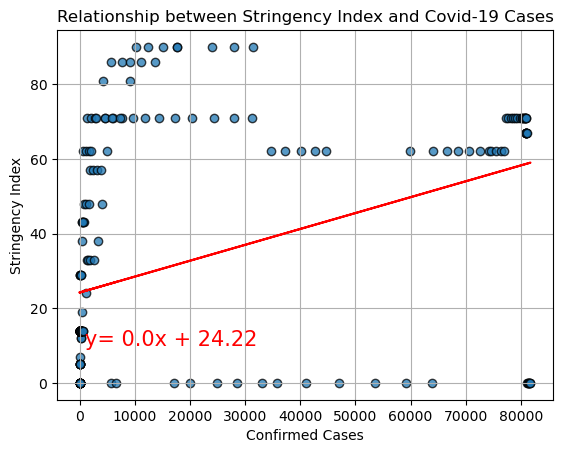

In [16]:
#Calculate correlation
x_axis = merged_data_na["Confirmed Cases"]
y_axis = merged_data_na["Stringency Index"]

plt.scatter(x_axis , y_axis, marker="o", edgecolors="black", alpha=0.75)


#labels to scatter plot 
plt.title("Relationship between Stringency Index and Covid-19 Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Stringency Index")
plt.grid()

plt.savefig("Result\.Relationship between Stringency Index and Covid-19 Cases.png")

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis  * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print("The r-value is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(1000,10),fontsize = 15, color = "red")

Factor 2: Impact of Vaccination Rate on the spread & severity of Covid-19 (Brecht Nys)

In [17]:
# Merge two datasets

vaccination_df = pd.merge(vaccination_cases_df, vaccination_rate_df,on=["location", "date"])

# Remove unnecessary columns

vaccination_df = vaccination_df[["location",
                                 "date",
                                 "total_cases",
                                 "total_deaths",
                                 "new_deaths",
                                 "reproduction_rate",
                                 "people_vaccinated",
                                 "people_fully_vaccinated",
                                 "population"]]

In [5]:
# Add necessary columns

vaccination_rate = []
fully_vaccination_rate = []
death_rate = []

for index, row in vaccination_df.iterrows():
    current_population = row["population"]
    current_vaccinated = row["people_vaccinated"]
    current__fully_vaccinated = row["people_fully_vaccinated"]
    current_total_cases = row["total_cases"]
    current_new_deaths = row["total_deaths"]
        
    vaccination_rate.append((current_vaccinated/current_population)*100)
    fully_vaccination_rate.append((current__fully_vaccinated/current_population)*100)
    if current_total_cases == 0:
        death_rate.append(0)
    else:
        death_rate.append((current_new_deaths/current_total_cases)*100)
    
vaccination_df["Vaccination Rate"] = vaccination_rate
vaccination_df["Fully Vaccinated Rate"] = fully_vaccination_rate
vaccination_df["Death Rate"] = death_rate


In [6]:
# Map Country to Continent

country_names = vaccination_df["location"].unique()
continent_name = [ ]

for country in country_names:
    country_url = "https://restcountries.com/v3.1/name/"
    response = requests.get(country_url + country).json()

    try:
        continent = response[0]["region"]
    except:
        continent = "Unknown"
    continent_name.append(continent)
    time.sleep(0.5)
    
country_mapping_df = pd.DataFrame({"location": country_names,
                                   "Continent": continent_name})

vaccination_df = pd.merge(vaccination_df, country_mapping_df,on="location")


The r-value for vaccination rate vs reproduction rate is: 0.02541201294849559
The r-value for fully vaccinated rate vs reproduction rate is: 0.050563762890705535


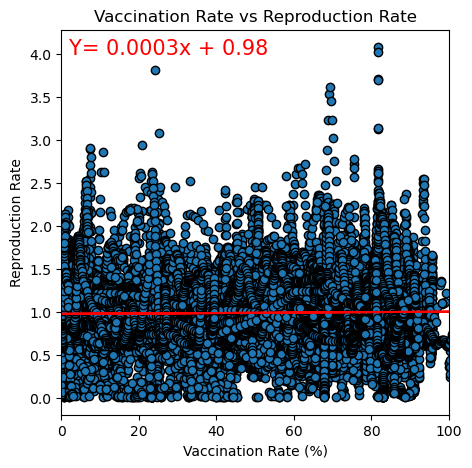

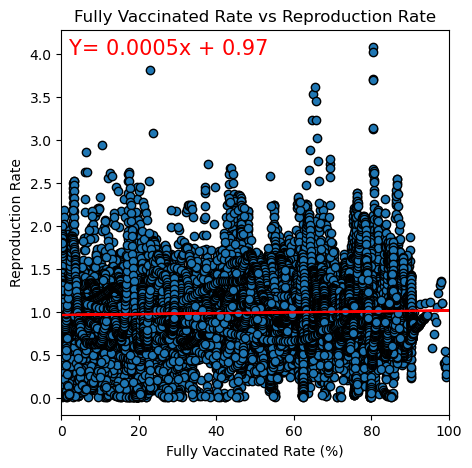

In [7]:
# Analyse connection between Vaccination Rate & Reproduction Rate

## Clean Dataset
### Remove all rows for which we do not have a Reproduction Rate

vaccination_reproduction_df = vaccination_df.drop(vaccination_df[vaccination_df["reproduction_rate"] <= 0].index)

### Remove all rows for which we do not have any vaccinated people

vaccination_reproduction_df = vaccination_reproduction_df.drop(vaccination_reproduction_df[vaccination_reproduction_df["people_vaccinated"] == 0].index)

## Scatter plot + linear regression for vaccination rate vs. reproduction rate

x_axis = vaccination_reproduction_df["Vaccination Rate"]
y_axis = vaccination_reproduction_df["reproduction_rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Reproduction Rate")
plt.title("Vaccination Rate vs Reproduction Rate")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for vaccination rate vs reproduction rate is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(2,4),fontsize = 15, color = "red")
plt.savefig("Result\Vaccination Rate vs Reproduction Rate.png")


## Scatter plot + linear regression for full vaccination rate vs. reproduction rate

fully_vaccination_reproduction_df = vaccination_reproduction_df.drop(vaccination_reproduction_df[vaccination_reproduction_df["people_fully_vaccinated"] == 0].index)

x_axis = fully_vaccination_reproduction_df["Fully Vaccinated Rate"]
y_axis = fully_vaccination_reproduction_df["reproduction_rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Fully Vaccinated Rate (%)")
plt.ylabel("Reproduction Rate")
plt.title("Fully Vaccinated Rate vs Reproduction Rate")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for fully vaccinated rate vs reproduction rate is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(2,4),fontsize = 15, color = "red")
plt.savefig("Result\Fully Vaccinated Rate vs Reproduction Rate.png")



The r-value for vaccination rate vs death rate is: -0.3236041007059785
The r-value for fully vaccinated rate vs death rate is: -0.35934246964816663


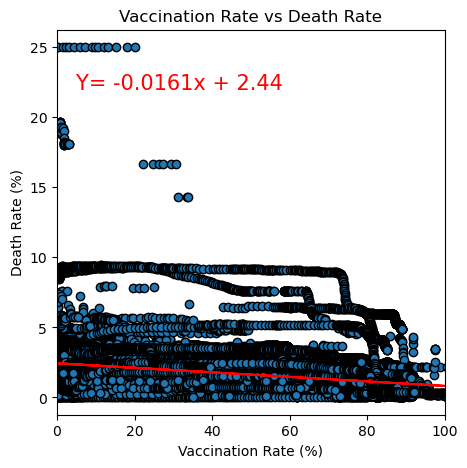

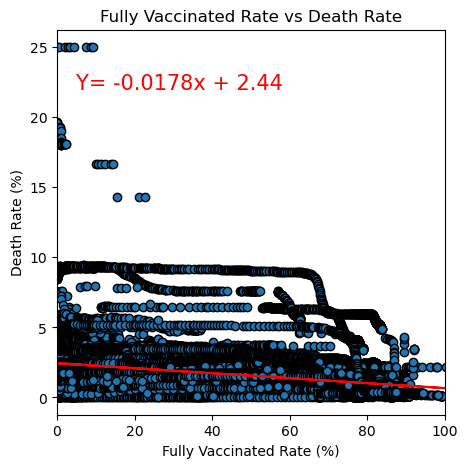

In [8]:
# Analyse connection between Vaccination Rate & Death Rate

## Clean Dataset
### Remove all rows for which we do not have a Death Rate

vaccination_death_df = vaccination_df.drop(vaccination_df[vaccination_df["Death Rate"] == 0].index)

### Remove all rows for which we do not have any vaccinated people

vaccination_death_df = vaccination_death_df.drop(vaccination_death_df[vaccination_death_df["people_vaccinated"] == 0].index)


## Scatter plot + linear regression for vaccination rate vs. reproduction rate

x_axis = vaccination_death_df["Vaccination Rate"]
y_axis = vaccination_death_df["Death Rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Death Rate (%)")
plt.title("Vaccination Rate vs Death Rate")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for vaccination rate vs death rate is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(5,22),fontsize = 15, color = "red")
plt.savefig("Result\Vaccination Rate vs Death Rate.png")

## Scatter plot + linear regression for fully vaccinated rate vs. reproduction rate

fully_vaccination_death_df = vaccination_death_df.drop(vaccination_death_df[vaccination_death_df["people_fully_vaccinated"] == 0].index)

x_axis = fully_vaccination_death_df["Fully Vaccinated Rate"]
y_axis = fully_vaccination_death_df["Death Rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Fully Vaccinated Rate (%)")
plt.ylabel("Death Rate (%)")
plt.title("Fully Vaccinated Rate vs Death Rate")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

# Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for fully vaccinated rate vs death rate is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(5,22),fontsize = 15, color = "red")
plt.savefig("Result\Fully Vaccinated Rate vs Death Rate.png")


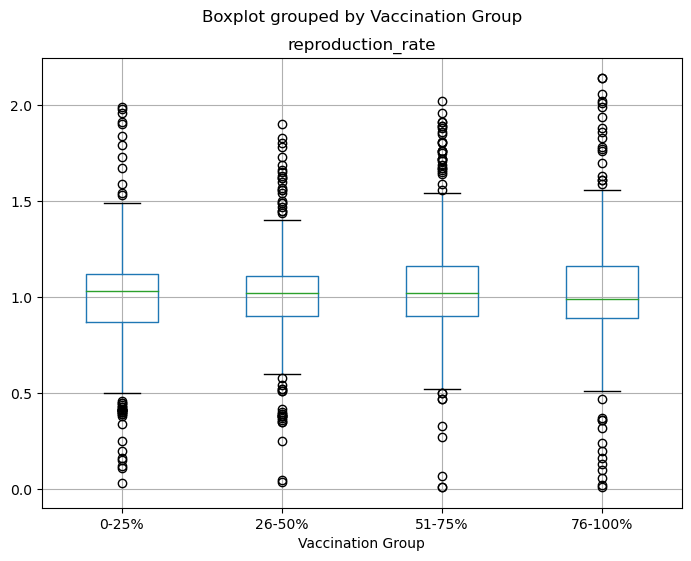

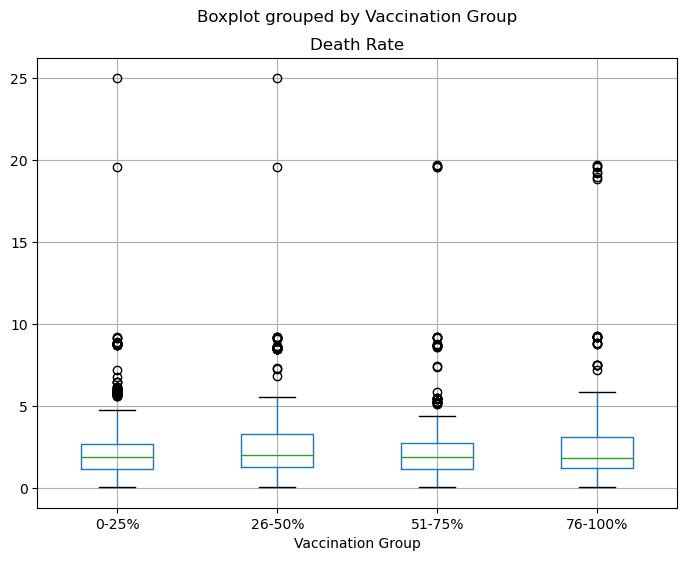

In [9]:
# Analyse connection based on bins

## Add Bins to the data

bins = [0, 0.25, 0.5, 0.75, 1]
name_bins = ["0-25%", "26-50%", "51-75%","76-100%"]

## Vaccination Rate vs Reproduction Rate

vaccination_reproduction_df["Vaccination Group"] = pd.cut(vaccination_reproduction_df["Vaccination Rate"], bins, labels= name_bins, include_lowest=True)

vaccination_reproduction_df.boxplot("reproduction_rate", by="Vaccination Group", figsize=(8, 6))
plt.savefig("Result\Boxplot vaccination rate vs reproduction rate.png")

### Vaccination Rate vs Death Rate

vaccination_death_df["Vaccination Group"] = pd.cut(vaccination_death_df["Vaccination Rate"], bins, labels= name_bins, include_lowest=True)
vaccination_death_df.boxplot("Death Rate", by="Vaccination Group", figsize=(8, 6))
plt.savefig("Result\Boxplot vaccination rate vs death rate.png")



The r-value for vaccination rate vs death rate in Asia is: -0.27592009813663193


NameError: name 'linregress' is not defined

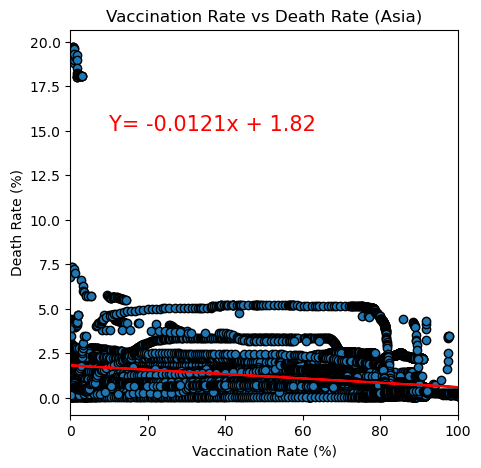

In [10]:
# Split across continents

## Asia

continent_vaccination_death_df = vaccination_death_df.loc[vaccination_death_df["Continent"] == "Asia",:]

### Add Scatter Plot

x_axis = continent_vaccination_death_df["Vaccination Rate"]
y_axis = continent_vaccination_death_df["Death Rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Death Rate (%)")
plt.title("Vaccination Rate vs Death Rate (Asia)")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

### Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for vaccination rate vs death rate in Asia is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(10,15),fontsize = 15, color = "red")
plt.savefig("Result\Vaccination Rate vs Death Rate (Asia).png")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
## Europe

continent_vaccination_death_df = vaccination_death_df.loc[vaccination_death_df["Continent"] == "Europe",:]

### Add Scatter Plot

x_axis = continent_vaccination_death_df["Vaccination Rate"]
y_axis = continent_vaccination_death_df["Death Rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Death Rate (%)")
plt.title("Vaccination Rate vs Death Rate (Europe)")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

### Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for vaccination rate vs death rate in Europe is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(40,5.5),fontsize = 15, color = "red")
plt.savefig("Result\Vaccination Rate vs Death Rate (Europe).png")


## Americas

continent_vaccination_death_df = vaccination_death_df.loc[vaccination_death_df["Continent"] == "Americas",:]

### Add Scatter Plot

x_axis = continent_vaccination_death_df["Vaccination Rate"]
y_axis = continent_vaccination_death_df["Death Rate"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Vaccination Rate (%)")
plt.ylabel("Death Rate (%)")
plt.title("Vaccination Rate vs Death Rate (Americas)")
plt.xlim(0, 100)

plt.scatter(x_axis,y_axis,marker="o",edgecolors="black")

### Add linear regression

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y= " + str(round(slope,4)) + "x + " + str(round(intercept,2))
print("The r-value for vaccination rate vs death rate in Americas is: " + str(rvalues))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, xy=(5,7),fontsize = 15, color = "red")
plt.savefig("Result\Vaccination Rate vs Death Rate (Americas).png")



Factor 3: Impact of Air Pollution Rate on the spread of Covid-19 (Xing Ying Chen)

1. World Most Polluted Countries Vs. Covid Data

In [11]:
### Merge and reset datasets

air_pollution_df=pd.merge(air_pollution_df,covid_country_df,on="Country/Region",how="inner")

air_pollution_df=air_pollution_df.rename(columns={"Rank":"Pollution Rank",
                                 "2021":"2021 Pollution Rate",
                                "2020":"2020 Pollution Rate",
                                "2019":"2019 Pollution Rate",
                                "2018":"2018 Pollution Rate",
                                "Confirmed":"Confirmed_Covid_Cases",
                                "Deaths":"Death_Covid_Cases",
                                "Recovered":"Recovered_Covid_Cases"})
air_pollution_df

air_pollution_df['2020 Pollution Rate']=air_pollution_df['2020 Pollution Rate'].replace('-',np.nan)
air_pollution_df['2019 Pollution Rate']=air_pollution_df['2019 Pollution Rate'].replace('-',np.nan)
air_pollution_df['2018 Pollution Rate']=air_pollution_df['2018 Pollution Rate'].replace('-',np.nan)

air_pollution_df['2020 Pollution Rate']=air_pollution_df['2020 Pollution Rate'].astype(float)
air_pollution_df['2019 Pollution Rate']=air_pollution_df['2019 Pollution Rate'].astype(float)
air_pollution_df['2018 Pollution Rate']=air_pollution_df['2018 Pollution Rate'].astype(float)

air_pollution_df[['2018 Pollution Rate', '2019 Pollution Rate', '2020 Pollution Rate', '2021 Pollution Rate']].ffill(axis=0,inplace=True)
air_pollution_df['Average Pollution Rate'] = air_pollution_df[['2018 Pollution Rate', '2019 Pollution Rate', '2020 Pollution Rate', '2021 Pollution Rate']].mean(axis=1)

air_pollution_df

C:\Users\nysbr\AppData\Local\Temp\ipykernel_10800\4093940248.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_pollution_df[['2018 Pollution Rate', '2019 Pollution Rate', '2020 Pollution Rate', '2021 Pollution Rate']].ffill(axis=0,inplace=True)


,Pollution Rank,Country/Region,2021 Pollution Rate,2020 Pollution Rate,2019 Pollution Rate,2018 Pollution Rate,Population,Confirmed_Covid_Cases,Death_Covid_Cases,Recovered_Covid_Cases,...,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Average Pollution Rate
0,1,Bangladesh,76.9,77.1,83.3,97.1,164689383,226225,2965,125683,...,37,1801,1.31,55.56,2.36,207453,18772,9.05,South-East Asia,83.600
1,2,Chad,75.9,NaN,NaN,NaN,16425859,922,75,810,...,0,0,8.13,87.85,9.26,889,33,3.71,Africa,75.900
2,3,Pakistan,66.8,59.0,65.8,74.3,220892331,274289,5842,241026,...,20,3592,2.13,87.87,2.42,266096,8193,3.08,Eastern Mediterranean,66.475
3,4,Tajikistan,59.4,30.9,NaN,NaN,9537642,7235,60,6028,...,1,58,0.83,83.32,1.00,6921,314,4.54,Europe,45.150
4,5,India,58.1,51.9,58.1,72.5,1380004385,1480073,33408,951166,...,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia,60.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,108,Estonia,5.9,5.9,6.2,7.2,1326539,2034,69,1923,...,0,1,3.39,94.54,3.59,2021,13,0.64,Europe,6.300
100,109,Australia,5.7,7.6,8.0,6.8,25499881,15303,167,9311,...,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific,7.025
101,110,Bahamas,5.5,NaN,NaN,NaN,393248,382,11,91,...,0,0,2.88,23.82,12.09,174,208,119.54,Americas,5.500
102,111,Grenada,5.5,NaN,NaN,NaN,112519,23,0,23,...,0,0,0.00,100.00,0.00,23,0,0.00,Americas,5.500


In [12]:
confirmed_covid_case_rate = air_pollution_df["Confirmed_Covid_Cases"] / air_pollution_df["Population"] * 100
air_pollution_df["Confirmed_Covid_Case_Rate"] = confirmed_covid_case_rate


death_rate=air_pollution_df["Death_Covid_Cases"]/air_pollution_df["Confirmed_Covid_Cases"]*100
air_pollution_df["Covid_Death_Rate"]=death_rate



recovered_rate=air_pollution_df["Recovered_Covid_Cases"]/air_pollution_df["Confirmed_Covid_Cases"]*100
air_pollution_df["Covid_Recovered_Rate"]=recovered_rate



covid_air_pollution_df=air_pollution_df[["Pollution Rank",
                                         "Country/Region",
                                         "Confirmed_Covid_Case_Rate",
                                         "Covid_Death_Rate",
                                         "Covid_Recovered_Rate",
                                         ]]
covid_air_pollution_df


,Pollution Rank,Country/Region,Confirmed_Covid_Case_Rate,Covid_Death_Rate,Covid_Recovered_Rate
0,1,Bangladesh,0.137365,1.310642,55.556636
1,2,Chad,0.005613,8.134490,87.852495
2,3,Pakistan,0.124173,2.129870,87.873010
3,4,Tajikistan,0.075857,0.829302,83.317208
4,5,India,0.107251,2.257186,64.264803
...,...,...,...,...,...
99,108,Estonia,0.153331,3.392330,94.542773
100,109,Australia,0.060012,1.091289,60.844279
101,110,Bahamas,0.097140,2.879581,23.821990
102,111,Grenada,0.020441,0.000000,100.000000


The r-value for Confirmed Covid Case Rate Vs.Pollution Rank  is: -0.13017614048201906
Y= -0.0021127x + 0.48
The r-value for Covid_Death Rate Vs.Pollution Rank is: 0.26619515205555033
Y= 0.02729755x + 1.96
The r-value for Covid Recovered Rate Vs.Pollution Rank is: -0.08663041556397875
Y= -0.06869839x + 70.26


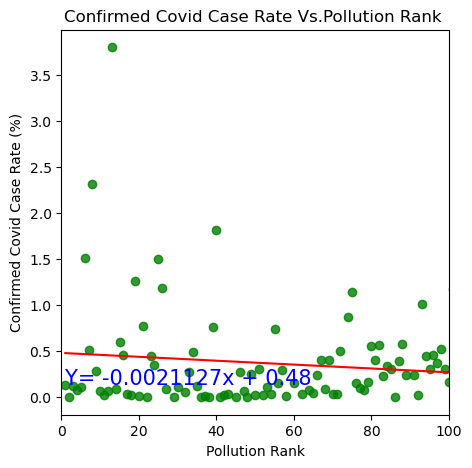

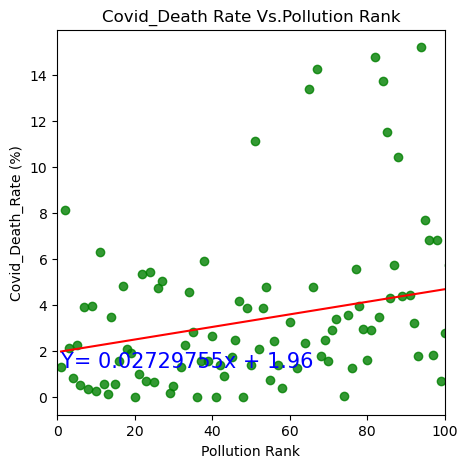

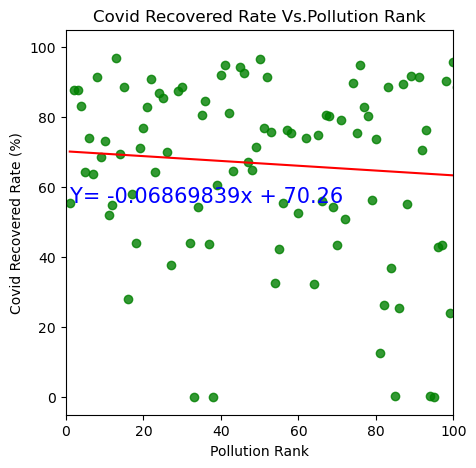

In [14]:
# Scatter plot + linear regression    

##Scatter plot function

def Linear_R_plot(data_x, data_y, title, xlabel, ylabel, filename):
    plt.figure(figsize=(5,5))
    plt.tight_layout()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim(0, 100)

    plt.scatter(data_x,data_y,alpha=0.8,c="green",marker="o")
   

    ## Add linear regression

    (slope, intercept, rvalues, pvalue, stderr) = st.linregress(data_x, data_y)
    regress_values = data_x * slope + intercept
    line_eq = "Y= " + str(round(slope,8)) + "x + " + str(round(intercept,2))
    print(f"The r-value for {title} is: {str(rvalues)}")
    print(line_eq)
    plt.plot(data_x, regress_values, "r-")
    plt.annotate(line_eq,(data_x.head(1),data_y.head(1)),fontsize = 15,color = "blue")
    plt.savefig(filename)
    

## Scatter plot for Confirmed Covid Cases Vs.Pollution Rank

Linear_R_plot(covid_air_pollution_df["Pollution Rank"],
              covid_air_pollution_df["Confirmed_Covid_Case_Rate"],
              "Confirmed Covid Case Rate Vs.Pollution Rank ",
              "Pollution Rank",
              "Confirmed Covid Case Rate (%)",
              "Result\Confirmed Covid Cases Vs.Pollution Rank.png")

## Scatter plot for Deaths Vs.Pollution Rank

Linear_R_plot(covid_air_pollution_df["Pollution Rank"],
              covid_air_pollution_df["Covid_Death_Rate"],
              "Covid_Death Rate Vs.Pollution Rank",
              "Pollution Rank",
              "Covid_Death_Rate (%)",
              "Result\Deaths Vs.Pollution rank.png")

## Scatter plot for Recovered Covid Cases Vs.Pollution Rank

Linear_R_plot(covid_air_pollution_df["Pollution Rank"],
              covid_air_pollution_df["Covid_Recovered_Rate"],
              "Covid Recovered Rate Vs.Pollution Rank",
              "Pollution Rank",
              "Covid Recovered Rate (%)",
              "Result\Covid Recovered Rate Vs.Pollution Rank.png")


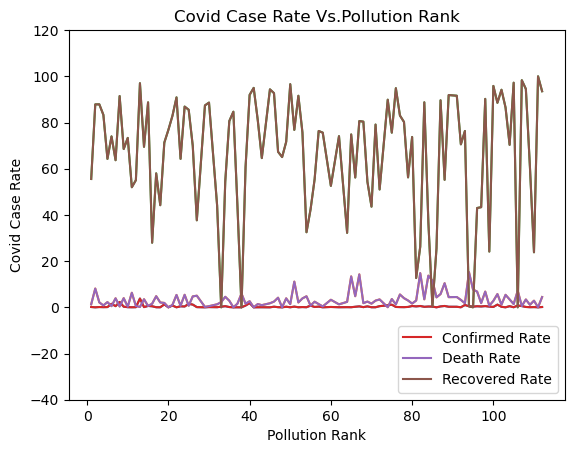

In [15]:
plt.plot(covid_air_pollution_df["Pollution Rank"],covid_air_pollution_df["Confirmed_Covid_Case_Rate"])
plt.plot(covid_air_pollution_df["Pollution Rank"],covid_air_pollution_df["Covid_Death_Rate"])
plt.plot(covid_air_pollution_df["Pollution Rank"],covid_air_pollution_df["Covid_Recovered_Rate"])
plt.xlabel('Pollution Rank')
plt.ylabel('Covid Case Rate')
plt.title("Covid Case Rate Vs.Pollution Rank")
plt.ylim(-40,120)

plt.errorbar(covid_air_pollution_df["Pollution Rank"],covid_air_pollution_df["Confirmed_Covid_Case_Rate"],label='Confirmed Rate')
plt.errorbar(covid_air_pollution_df["Pollution Rank"],covid_air_pollution_df["Covid_Death_Rate"],label='Death Rate')
plt.errorbar(covid_air_pollution_df["Pollution Rank"],covid_air_pollution_df["Covid_Recovered_Rate"],label='Recovered Rate')


plt.legend(loc='lower right')


plt.savefig("Result\Covid Case Rate Vs Pollution Rank.png")
plt.show()

